In [ ]:
pip install ndjson

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install streamlit

     |████████████████████████████████| 9.6 MB 45.2 MB/s eta 0:00:01
     |████████████████████████████████| 731 kB 26.7 MB/s eta 0:00:01
     |████████████████████████████████| 207 kB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 417 kB 40.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 50.9 MB/s eta 0:00:01
     |████████████████████████████████| 242 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 1.3 MB/s eta 0:00:01120.4 MB 35.3 MB/s eta 0:00:01     |██████████████████████          | 21.1 MB 35.3 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 17.7 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.9.0
    Uninstalling typing-extensions-4.9.0:
     

In [25]:

import json
import pandas as pd
import regex as re
import ndjson
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Load data
drive_path = 'export_All-Project-Cards_2025-02-21_16-50-28.ndjson'
with open(drive_path, 'r') as f:
    data = ndjson.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

In [27]:
df.head()

,Blocked,Commercialization,Commercialization Pathways,Community,Dynamic Link,Field of Interest (text),Followers (Received)
0,magnus@gmail.com,,,Adjacent,https://adjacent.page.link/nWZPDGa1c2q4EBpK7,"Community Building , Information Science , Fut...",275
1,,,,Adjacent,,Art,10
2,,,,Adjacent,,Food,7
3,,,,Adjacent,https://adjacent.page.link/FLqtvSHo4bPwLWdn8,Technology Development,4
4,,,,Adjacent,,,0


In [28]:

# Replace NA/None with empty strings
df.fillna("", inplace=True)

# Clean and standardize data
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].str.lower().str.strip()

# Remove commas from 'Field of Interest (text)'
if 'Field of Interest (text)' in df.columns:
    df['Field of Interest (text)'] = df['Field of Interest (text)'].str.replace(",", "")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Validate and clean URLs in 'Dynamic Link'
if 'Dynamic Link' in df.columns:
    df['Dynamic Link'] = df['Dynamic Link'].apply(
        lambda x: x if re.match(r'^https?:\/\/\S+$', x) else ""
    )

# Extract city, state, and country from 'Location'
if 'Location' in df.columns:
    def parse_location(location):
        parts = location.split(", ")
        city = parts[0] if len(parts) > 0 else ""
        state = parts[1] if len(parts) > 1 else ""
        country = parts[-1] if len(parts) > 2 else state
        return pd.Series({"City": city, "State": state, "Country": country})

    location_split = df['Location'].apply(parse_location)
    df = pd.concat([df, location_split], axis=1)

In [29]:
df.head()

,Blocked,Commercialization,Commercialization Pathways,Community,Dynamic Link,Field of Interest (text),Followers (Received)
0,magnus@gmail.com,,,adjacent,https://adjacent.page.link/nwzpdga1c2q4ebpk7,community building information science futur...,275
1,,,,adjacent,,art,10
2,,,,adjacent,,food,7
3,,,,adjacent,https://adjacent.page.link/flqtvsho4bpwlwdn8,technology development,4
4,,,,adjacent,,,0


In [30]:
df['Field of Interest (text)'][0]

'community building  information science  future building  tech  design'

In [33]:
df['Field of Interests Lists'] = df['Field of Interest (text)'].str.split('  ')

In [35]:
df['Field of Interests Lists'].value_counts()

[]                                                                                                                         7
[medicine/health]                                                                                                          2
[fintech]                                                                                                                  2
[community building, information science, future building, tech, design]                                                   1
[communication/media, future building]                                                                                     1
[chemistry, civil engineering]                                                                                             1
[art & music]                                                                                                              1
[community building, biology, chemistry]                                                                                   1


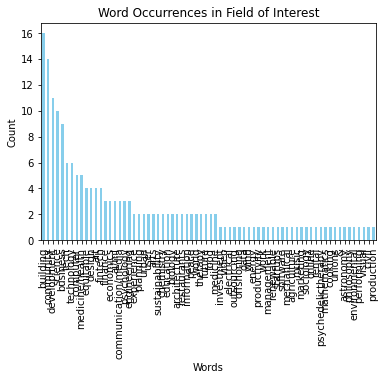

2025-02-27 14:32:53.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:32:54.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 14:32:54.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [20]:
word_counts = pd.Series([word for sublist in df['Field of Interests Lists'] for word in sublist]).value_counts()

# Create bar chart
fig, ax = plt.subplots()
word_counts.plot(kind='bar', color='skyblue', ax=ax)
ax.set_xlabel("Words")
ax.set_ylabel("Count")
ax.set_title("Word Occurrences in Field of Interest")
plt.show()

st.pyplot(fig)